<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Utrecht_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ictinstitute/utrecht-housing-dataset
! unzip '/content/utrecht-housing-dataset.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [5]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [105]:
ds_df = pd.read_csv("/content/data/utrechthousinghuge.csv")


In [106]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2499 non-null   int64  
 1   zipcode      2499 non-null   int64  
 2   lot-len      2499 non-null   float64
 3   lot-width    2499 non-null   float64
 4   lot-area     2499 non-null   int64  
 5   house-area   2499 non-null   int64  
 6   garden-size  2499 non-null   int64  
 7   balcony      2499 non-null   int64  
 8   x-coor       2499 non-null   int64  
 9   y-coor       2499 non-null   int64  
 10  buildyear    2499 non-null   int64  
 11  bathrooms    2499 non-null   int64  
 12  taxvalue     2499 non-null   int64  
 13  retailvalue  2499 non-null   int64  
 14  energy-eff   2499 non-null   int64  
 15  monument     2499 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 312.5 KB


In [107]:
ds_df.nunique()

id             2499
zipcode           4
lot-len         736
lot-width       101
lot-area        881
house-area      170
garden-size     907
balcony           3
x-coor          883
y-coor          927
buildyear        41
bathrooms         2
taxvalue       1380
retailvalue     325
energy-eff        2
monument          2
dtype: int64

In [108]:
ds_df["zipcode"] = ds_df["zipcode"].astype(str)

In [109]:
ds_df.corr().round(2)

id  lot-len  lot-width  lot-area  house-area  garden-size  \
id           1.00    -0.01       0.04      0.01       -0.00         0.01   
lot-len     -0.01     1.00      -0.26      0.93        0.52         0.93   
lot-width    0.04    -0.26       1.00      0.04        0.01         0.04   
lot-area     0.01     0.93       0.04      1.00        0.55         1.00   
house-area  -0.00     0.52       0.01      0.55        1.00         0.55   
garden-size  0.01     0.93       0.04      1.00        0.55         1.00   
balcony      0.05    -0.06       0.01     -0.05        0.05        -0.06   
x-coor       0.00     0.21      -0.00      0.23        0.41         0.22   
y-coor      -0.00    -0.46      -0.02     -0.49       -0.30        -0.49   
buildyear   -0.00    -0.08      -0.01     -0.09        0.20        -0.09   
bathrooms    0.01     0.26       0.03      0.29        0.41         0.29   
taxvalue     0.01     0.88       0.03      0.94        0.80         0.94   
retailvalue  0.01     0.88       0.03      0.93        0.78         0.93   
energy-eff  -0.01    -0.41      -0.03     -0.44       -0.50        -0.44   
monument    -0.00     0.29       0.00      0.31        0.30         0.31   

             balcony  x-coor  y-coor  buildyear  bathrooms  taxvalue  \
id              0.05    0.00   -0.00      -0.00       0.01      0.01   
lot-len        -0.06    0.21   -0.46      -0.08       0.26      0.88   
lot-width       0.01   -0.00   -0.02      -0.01       0.03      0.03   
lot-area       -0.05    0.23   -0.49      -0.09       0.29      0.94   
house-area      0.05    0.41   -0.30       0.20       0.41      0.80   
garden-size    -0.06    0.22   -0.49      -0.09       0.29      0.94   
balcony         1.00    0.17    0.02       0.33      -0.02     -0.00   
x-coor          0.17    1.00    0.16       0.59       0.16      0.34   
y-coor          0.02    0.16    1.00       0.31      -0.17     -0.52   
buildyear       0.33    0.59    0.31       1.00       0.02      0.03   
bathrooms      -0.02    0.16   -0.17       0.02       1.00      0.37   
taxvalue       -0.00    0.34   -0.52       0.03       0.37      1.00   
retailvalue     0.00    0.27   -0.56      -0.01       0.36      0.99   
energy-eff      0.21    0.05    0.38       0.47      -0.25     -0.51   
monument        0.16    0.15   -0.18       0.03       0.17      0.35   

             retailvalue  energy-eff  monument  
id                  0.01       -0.01     -0.00  
lot-len             0.88       -0.41      0.29  
lot-width           0.03       -0.03      0.00  
lot-area            0.93       -0.44      0.31  
house-area          0.78       -0.50      0.30  
garden-size         0.93       -0.44      0.31  
balcony             0.00        0.21      0.16  
x-coor              0.27        0.05      0.15  
y-coor             -0.56        0.38     -0.18  
buildyear          -0.01        0.47      0.03  
bathrooms           0.36       -0.25      0.17  
taxvalue            0.99       -0.51      0.35  
retailvalue         1.00       -0.51      0.34  
energy-eff         -0.51        1.00     -0.19  
monument            0.34       -0.19      1.00


# II. Preprocessing

In [110]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [111]:
reg_models = setup(
    data=train_df, target='retailvalue', ignore_features=['id', 'taxvalue'],
    session_id=123)

In [114]:
best_model = compare_models(fold=5)


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

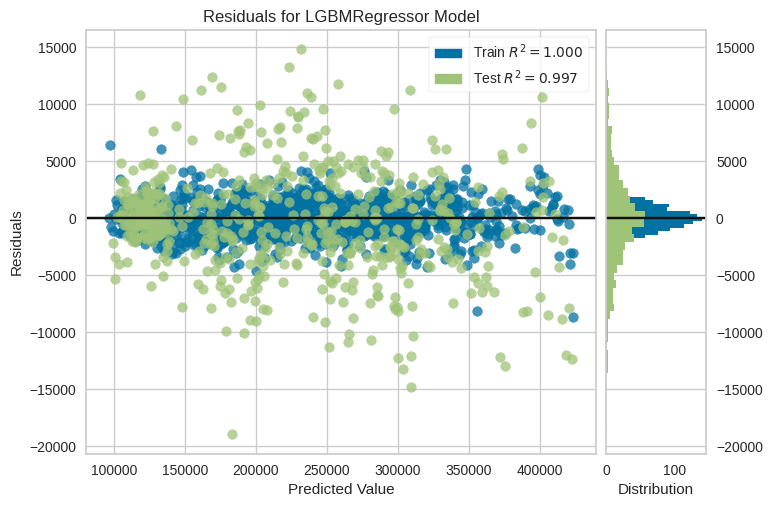

In [115]:
plot_model(best_model)

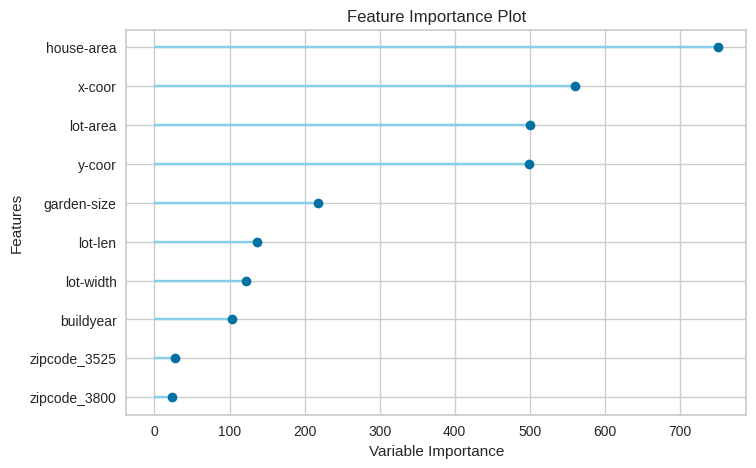

In [119]:
plot_model(best_model, plot="feature")

In [117]:
lightgbm = create_model("lightgbm", fold=5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [120]:
lgbm_preds = predict_model(lightgbm, data=train_df)

In [122]:
import matplotlib.pyplot as plt

In [123]:
lgbm_preds["residual"] = lgbm_preds["retailvalue"] - lgbm_preds["prediction_label"]

In [127]:
lgbm_preds["scaled_residual"] = lgbm_preds["residual"]/lgbm_preds["retailvalue"]

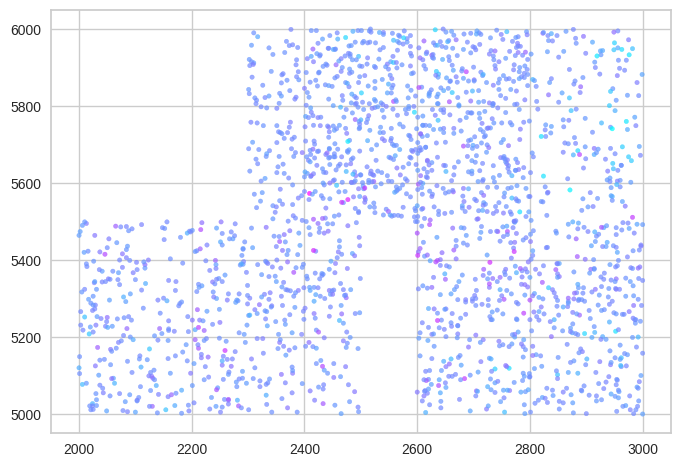

In [126]:
plt.scatter(
    data=lgbm_preds, x="x-coor", y="y-coor", c="residual",
    cmap="cool", s=10, alpha=.7)

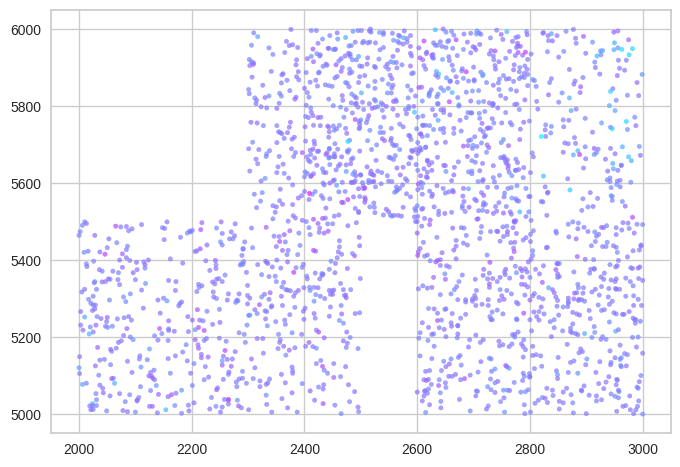

In [128]:
plt.scatter(
    data=lgbm_preds, x="x-coor", y="y-coor", c="scaled_residual",
    cmap="cool", s=10, alpha=.7)

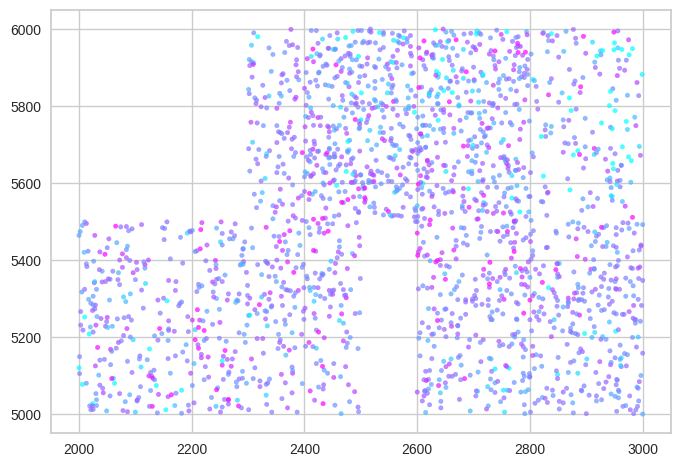

In [130]:
plt.scatter(
    data=lgbm_preds, x="x-coor", y="y-coor",
    c=lgbm_preds["scaled_residual"].clip(
        lgbm_preds["scaled_residual"].quantile(.03),
        lgbm_preds["scaled_residual"].quantile(.97)),
    cmap="cool", s=10, alpha=.7)

In [131]:
ds_df["house-area"].describe()

count    2499.000000
mean      138.014406
std        42.984094
min        80.000000
25%       103.000000
50%       128.000000
75%       164.000000
max       250.000000
Name: house-area, dtype: float64

In [134]:
ds_df["lot-area"].describe()

count    2499.000000
mean      506.726691
std       319.793785
min       110.000000
25%       148.000000
50%       513.000000
75%       771.500000
max      1200.000000
Name: lot-area, dtype: float64

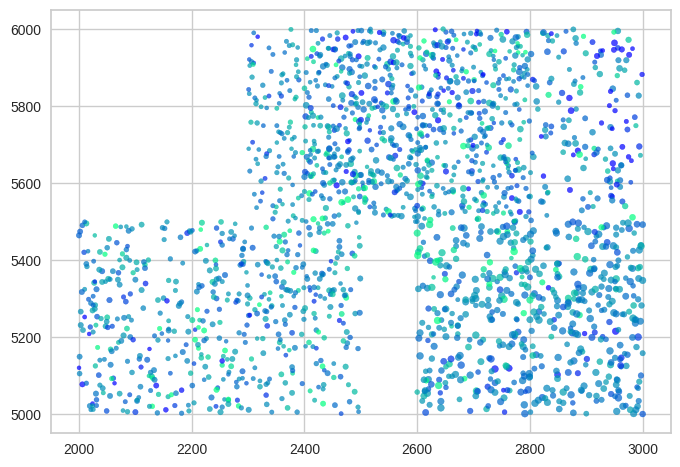

In [133]:
plt.scatter(
    data=lgbm_preds, x="x-coor", y="y-coor",
    c=lgbm_preds["scaled_residual"].clip(
        lgbm_preds["scaled_residual"].quantile(.03),
        lgbm_preds["scaled_residual"].quantile(.97)),
    cmap="winter", s=lgbm_preds["house-area"]/10, alpha=.7)

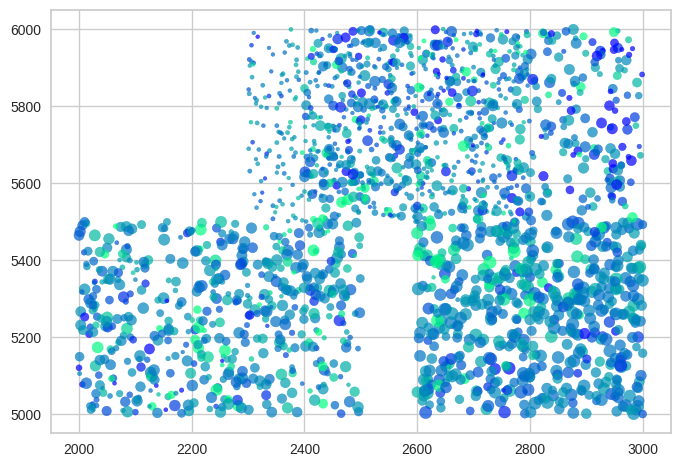

In [135]:
plt.scatter(
    data=lgbm_preds, x="x-coor", y="y-coor",
    c=lgbm_preds["scaled_residual"].clip(
        lgbm_preds["scaled_residual"].quantile(.03),
        lgbm_preds["scaled_residual"].quantile(.97)),
    cmap="winter", s=lgbm_preds["lot-area"]/15, alpha=.7)

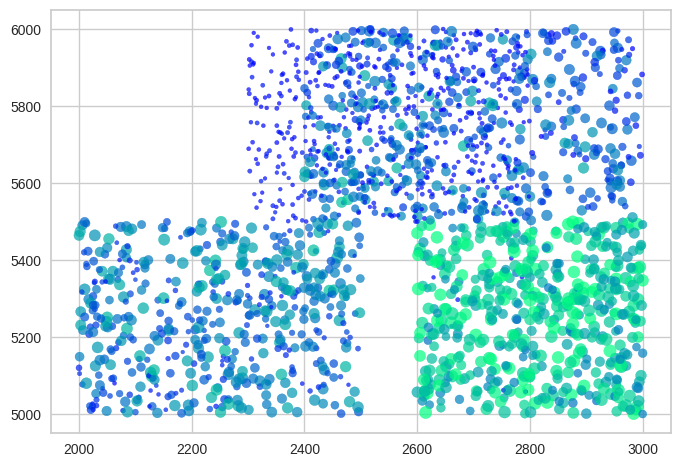

In [142]:
plt.scatter(
    data=lgbm_preds, x="x-coor", y="y-coor",
    c=lgbm_preds["retailvalue"].clip(
        lgbm_preds["retailvalue"].quantile(.03),
        lgbm_preds["retailvalue"].quantile(.97)),
    cmap="winter", s=lgbm_preds["lot-area"]/15, alpha=.7)

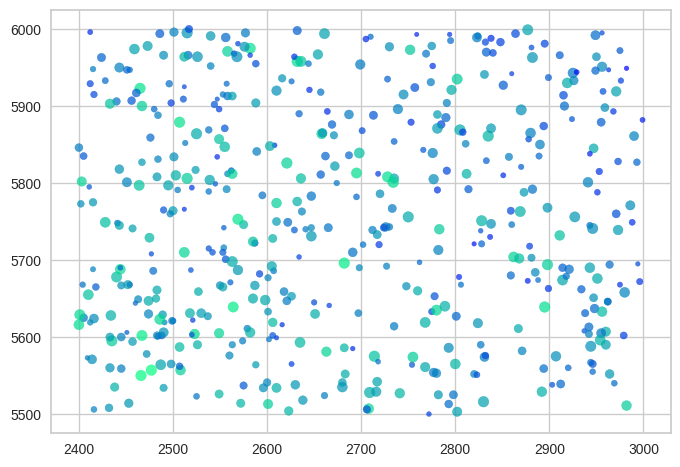

In [146]:
plt.scatter(
    data=lgbm_preds[lgbm_preds["zipcode"]=="3525"], x="x-coor", y="y-coor",
    c=lgbm_preds[lgbm_preds["zipcode"]=="3525"]["retailvalue"],
    cmap="winter", s=lgbm_preds[lgbm_preds["zipcode"]=="3525"]["lot-area"]/15,
    alpha=.7)

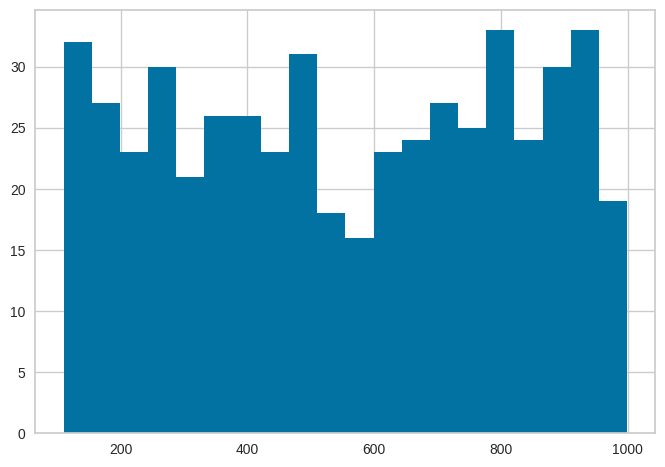

In [157]:
plt.hist(lgbm_preds[lgbm_preds["zipcode"]=="3520"]["lot-area"], bins=20)
plt.show()

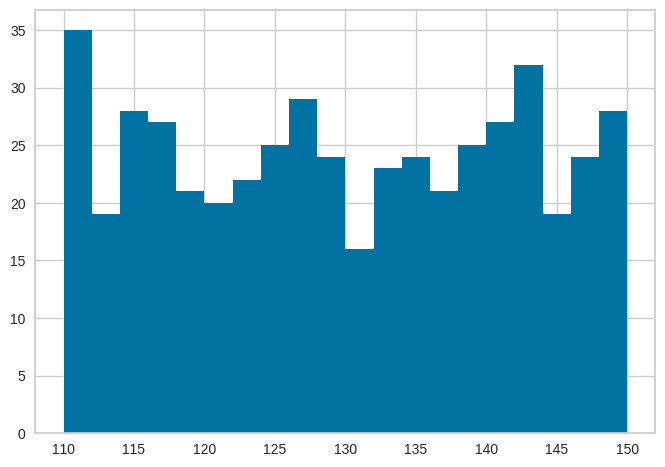

In [156]:
plt.hist(lgbm_preds[lgbm_preds["zipcode"]=="3528"]["lot-area"], bins=20)
plt.show()

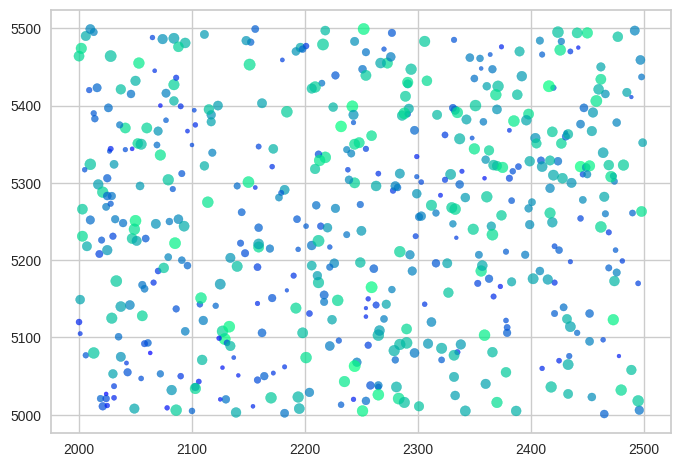

In [149]:
plt.scatter(
    data=lgbm_preds[lgbm_preds["zipcode"]=="3520"], x="x-coor", y="y-coor",
    c=lgbm_preds[lgbm_preds["zipcode"]=="3520"]["retailvalue"],
    cmap="winter", s=lgbm_preds[lgbm_preds["zipcode"]=="3520"]["lot-area"]/15,
    alpha=.7)

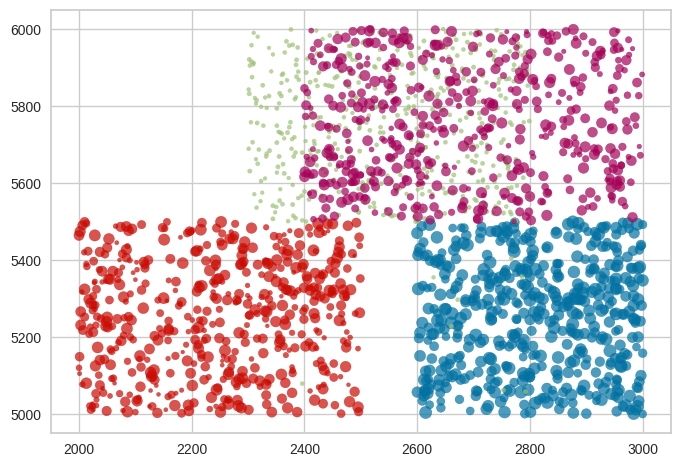

In [141]:
for z in lgbm_preds["zipcode"].unique():
  plt.scatter(
      data=lgbm_preds[lgbm_preds["zipcode"]==z], x="x-coor", y="y-coor",
      s=lgbm_preds[lgbm_preds["zipcode"]==z]["lot-area"]/15, alpha=.7)

In [215]:
(train_df["retailvalue"]-train_df["taxvalue"]).describe().round(0)

count     1999.0
mean     48979.0
std      11966.0
min       6200.0
25%      41200.0
50%      49500.0
75%      57900.0
max      81400.0
dtype: float64

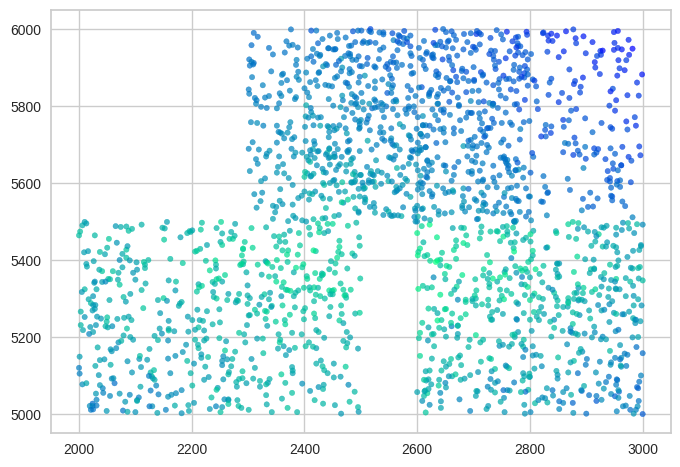

In [212]:
plt.scatter(
      data=train_df, x="x-coor", y="y-coor", c=train_df["retailvalue"]-train_df["taxvalue"],
      cmap="winter", s=15, alpha=.7)

In [217]:
z_3520["dist"] = (((z_3520["x-coor"]-2400)**2)+((z_3520["y-coor"]-5400)**2))**.5

In [235]:
z_3520["distb"] = ((((z_3520["x-coor"]-2400)**2)*2)+((z_3520["y-coor"]-5400)**2))**.5

In [236]:
z_3520["distc"] = ((((z_3520["x-coor"]-2400)**2)*1.5)+((z_3520["y-coor"]-5400)**2))**.5

In [218]:
z_3520["diff"] = z_3520["retailvalue"]-z_3520["taxvalue"]

In [222]:
z_3520["diff_pct"] = z_3520["diff"]/z_3520["taxvalue"]

In [248]:
z_3520[["dist", "distb", "distc", "distd", "manh_dist", "manh_distb","diff", "diff_pct"]].corr().round(3)

dist  distb  distc  distd  manh_dist  manh_distb   diff  diff_pct
dist        1.000  0.972  0.990  0.977      0.938       0.981 -0.685    -0.292
distb       0.972  1.000  0.996  0.948      0.907       0.950 -0.661    -0.288
distc       0.990  0.996  1.000  0.966      0.925       0.968 -0.675    -0.292
distd       0.977  0.948  0.966  1.000      0.979       0.965 -0.678    -0.282
manh_dist   0.938  0.907  0.925  0.979      1.000       0.955 -0.678    -0.268
manh_distb  0.981  0.950  0.968  0.965      0.955       1.000 -0.705    -0.291
diff       -0.685 -0.661 -0.675 -0.678     -0.678      -0.705  1.000    -0.393
diff_pct   -0.292 -0.288 -0.292 -0.282     -0.268      -0.291 -0.393     1.000

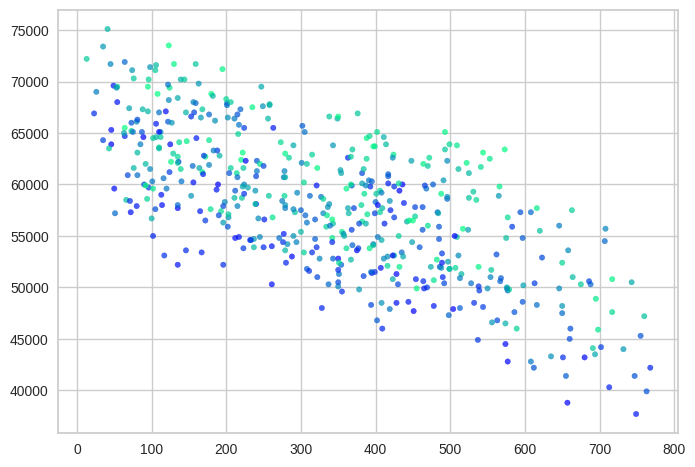

In [260]:
plt.scatter(
      data=z_3520, x="manh_distb", y="diff", c="house-area", cmap="winter", s=15, alpha=.7)

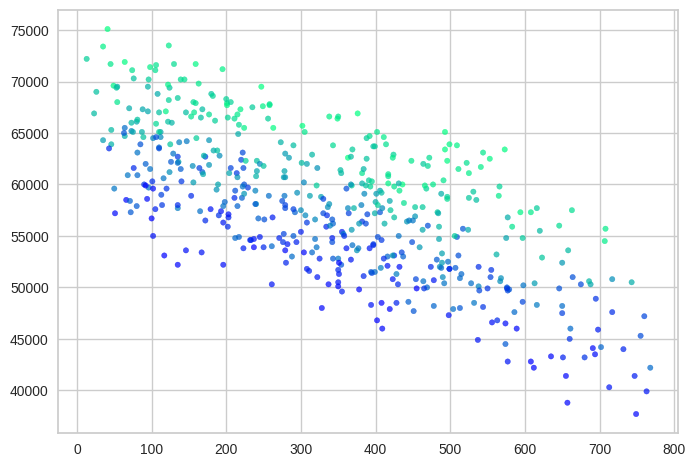

In [261]:
plt.scatter(
      data=z_3520, x="manh_distb", y="diff", c="lot-area", cmap="winter", s=15, alpha=.7)

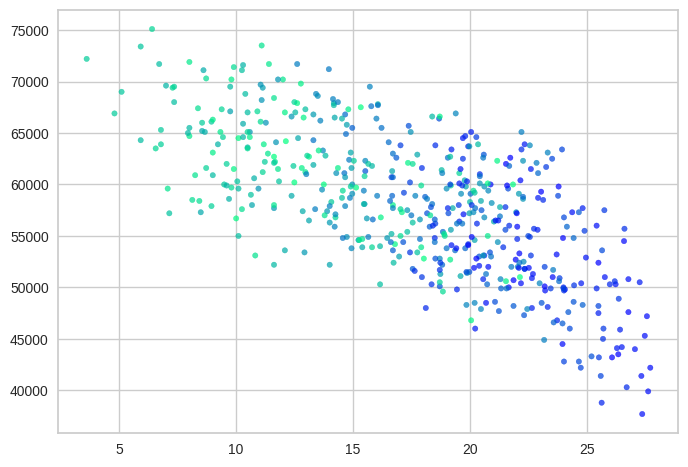

In [253]:
plt.scatter(
      data=z_3520, x=z_3520["manh_distb"]**.5, y="diff", c="x-coor", cmap="winter", s=15, alpha=.7)

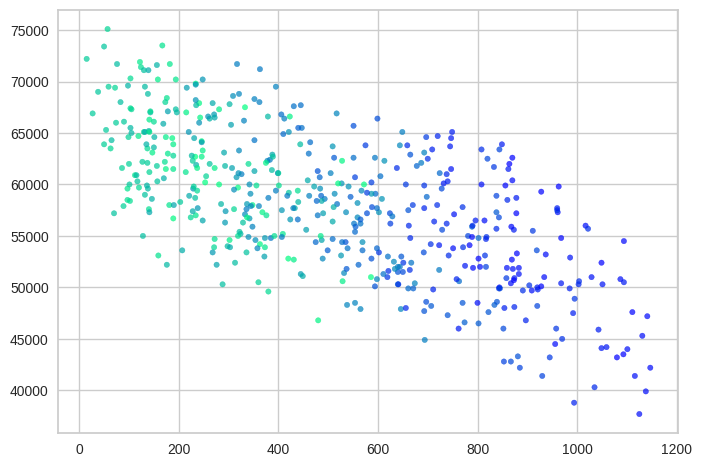

In [257]:
plt.scatter(
      data=z_3520,
      x=(abs((2400-z_3520["x-coor"])) *2)+ abs((5400-z_3520["y-coor"])),
      y="diff", c="x-coor", cmap="winter", s=15, alpha=.7)

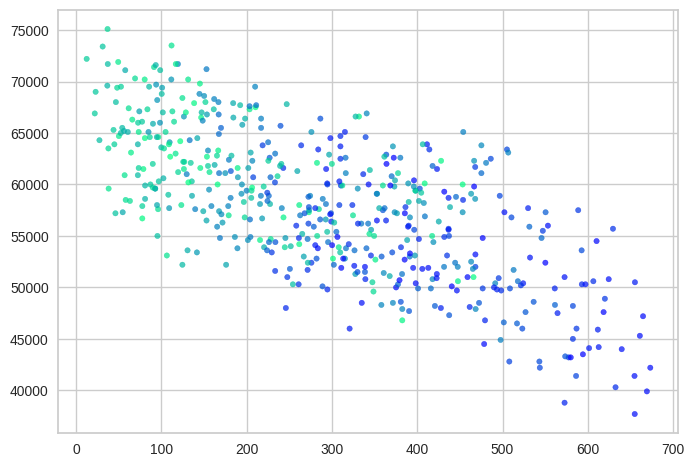

In [255]:
plt.scatter(
      data=z_3520,
      x=(abs((2400-z_3520["x-coor"])) *.75)+ abs((5400-z_3520["y-coor"])),
      y="diff", c="x-coor", cmap="winter", s=15, alpha=.7)


In [243]:
z_3520["manh_dist"] = (2500-z_3520["x-coor"]) + (5500-z_3520["y-coor"])

In [247]:
z_3520["manh_distb"] = abs((2400-z_3520["x-coor"])) + abs((5400-z_3520["y-coor"]))

In [245]:
z_3520["distd"] = (((z_3520["x-coor"]-2500)**2)+((z_3520["y-coor"]-5500)**2))**.5

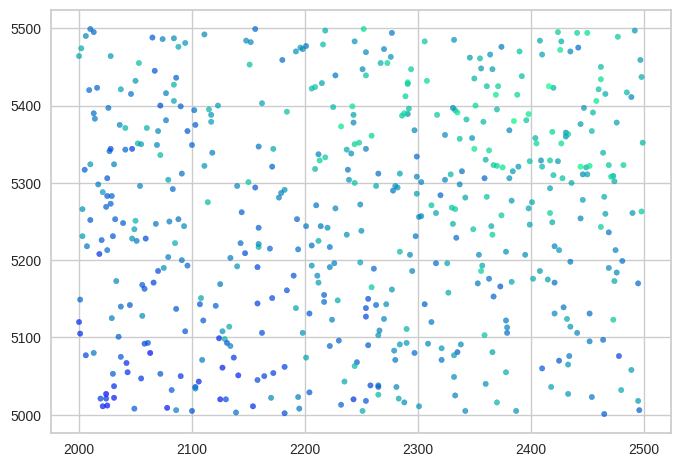

In [216]:
plt.scatter(
      data=z_3520, x="x-coor", y="y-coor", c=z_3520["retailvalue"]-z_3520["taxvalue"],
      cmap="winter", s=15, alpha=.7)

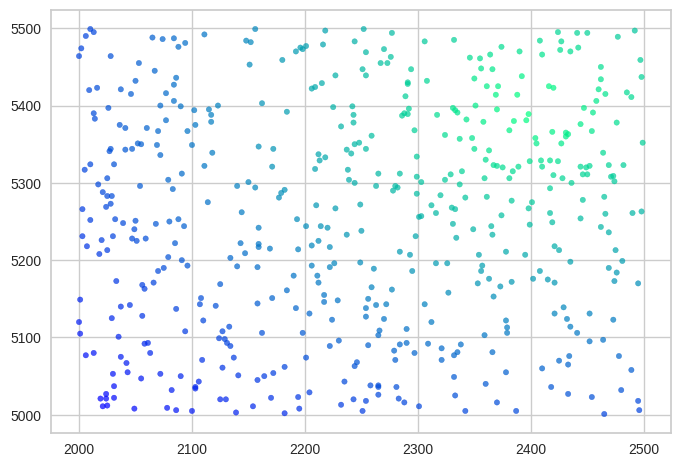

In [221]:
plt.scatter(
      data=z_3520, x="x-coor", y="y-coor", c=-z_3520["dist"],
      cmap="winter", s=15, alpha=.7)

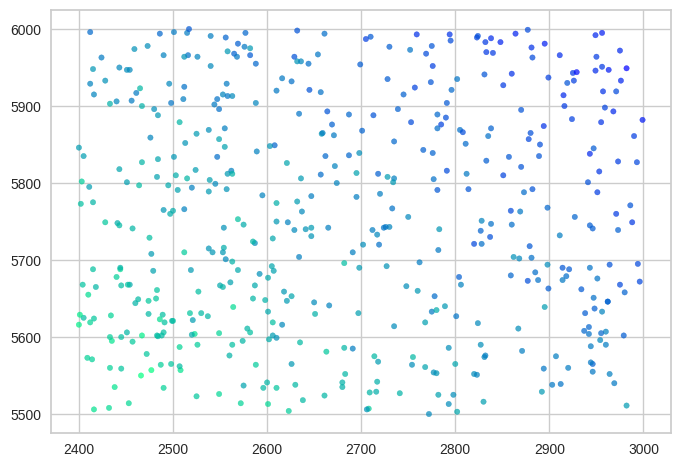

In [262]:
plt.scatter(
      data=z_3525, x="x-coor", y="y-coor", c=z_3525["retailvalue"]-z_3525["taxvalue"],
      cmap="winter", s=15, alpha=.7)

In [263]:
z_3525["manh_dist"] = (z_3525["x-coor"]-2400) + (z_3525["y-coor"]-5500)

In [268]:
z_3525["diff"] = z_3525["retailvalue"]-z_3525["taxvalue"]

In [267]:
z_3525

id zipcode  lot-len  lot-width  lot-area  house-area  garden-size  \
1466  10467    3525     58.7       15.1       886         140          816   
186    9187    3525     14.7       19.5       287         145          209   
995    9996    3525     21.7       16.3       353          91          292   
748    9749    3525     26.0       11.8       307         191          211   
2026  11027    3525     45.0       13.0       585         111          502   
...     ...     ...      ...        ...       ...         ...          ...   
668    9669    3525     12.8       12.5       160         166          104   
357    9358    3525     34.0       16.5       561         103          483   
1300  10301    3525     14.7       19.7       289         190          238   
905    9906    3525     22.1       15.9       352         173          290   
1061  10062    3525     53.0       16.4       870         116          776   

      balcony  x-coor  y-coor  buildyear  bathrooms  taxvalue  retailvalue  \
1466        1    2835    5861       2003          1    221900       255000   
186         0    2878    5857       2001          2    135100       158000   
995         0    2498    5904       1997          1    112600       147000   
748         0    2558    5812       1985          2    165700       209000   
2026        1    2790    5885       1983          1    159400       184000   
...       ...     ...     ...        ...        ...       ...          ...   
668         1    2860    5942       1985          1    128600       146000   
357         1    2632    5998       2000          1    151000       177000   
1300        1    2644    5955       2001          1    162400       195000   
905         0    2918    5679       1993          2    161600       194000   
1061        0    2750    5756       1999          1    205100       244000   

      energy-eff  monument  manh_dist  
1466           0         1        796  
186            0         0        835  
995            1         0        502  
748            0         0        470  
2026           0         1        775  
...          ...       ...        ...  
668            0         0        902  
357            1         0        730  
1300           0         1        699  
905            0         0        697  
1061           1         0        606  

[497 rows x 17 columns]

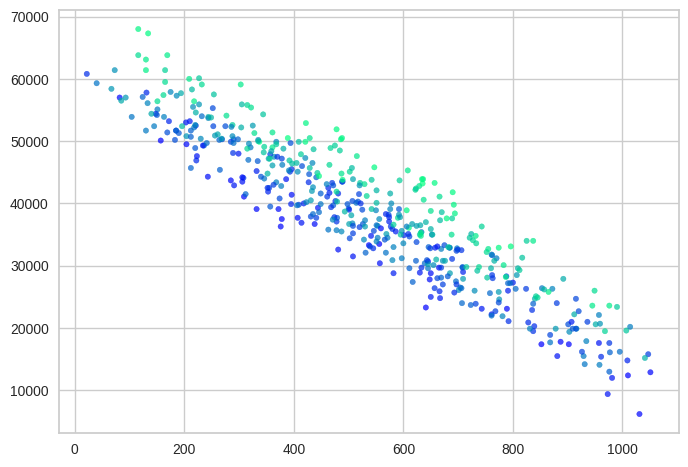

In [269]:
plt.scatter(
      data=z_3525, x="manh_dist", y="diff", c="lot-area", cmap="winter", s=15, alpha=.7)

In [137]:
lgbm_preds["zipcode"].unique()

['3800', '3528', '3520', '3525']
Categories (4, object): ['3520', '3525', '3528', '3800']

In [158]:
reg_models_tv = setup(
    data=train_df, target='taxvalue', ignore_features=['id', 'retailvalue'],
    session_id=124)

In [159]:
best_model_tv = compare_models(fold=5)


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

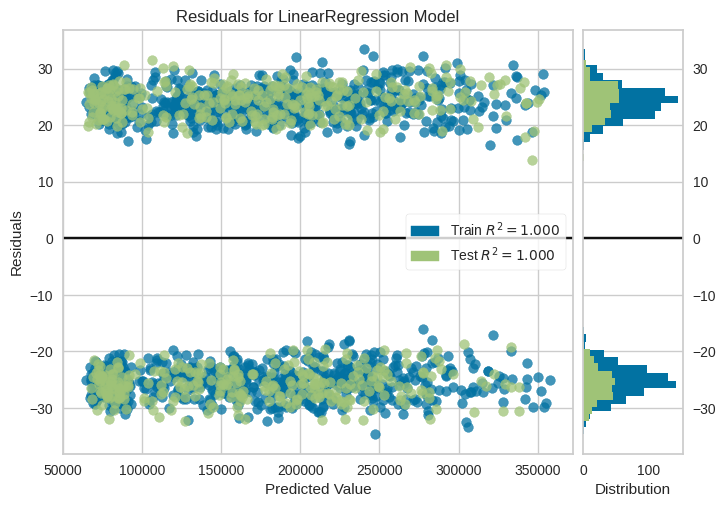

In [160]:
plot_model(best_model_tv)

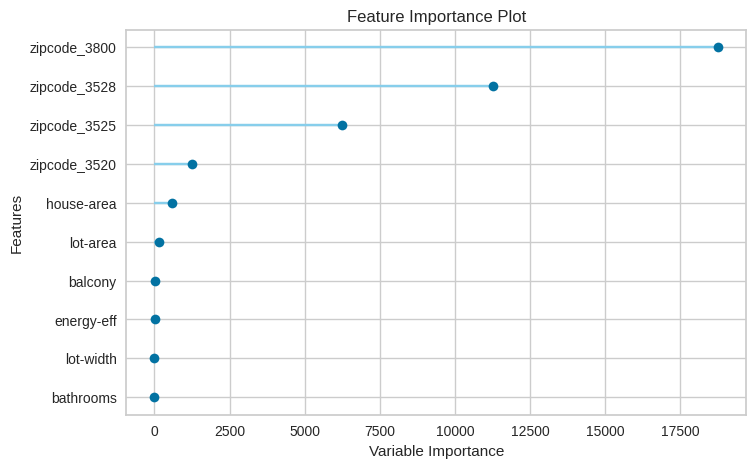

In [162]:
plot_model(best_model_tv, plot="feature")

In [161]:
lin_reg = create_model("lr")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [163]:
lrtv_preds = predict_model(lin_reg, data=train_df)

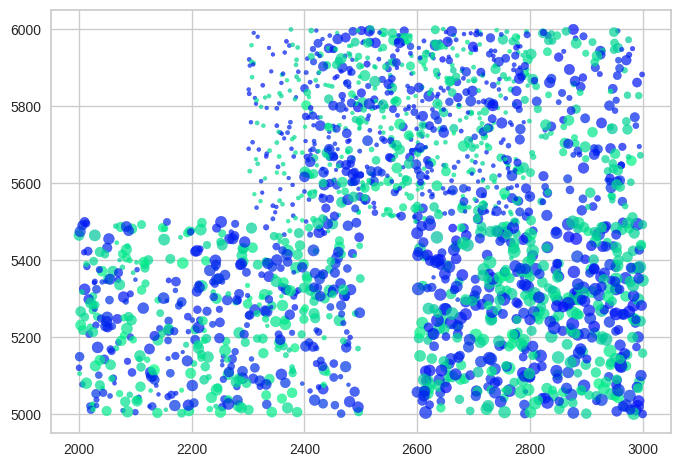

In [165]:
plt.scatter(
    data=lrtv_preds, x="x-coor", y="y-coor",
    c=lrtv_preds["taxvalue"]-lrtv_preds["prediction_label"],
    cmap="winter", s=lrtv_preds["lot-area"]/15,
    alpha=.7)

In [167]:
lrtv_preds["tvres_pos"] = (
    lrtv_preds["taxvalue"] - lrtv_preds["prediction_label"] > 0).astype(int)

In [169]:
lrtv_preds.groupby("tvres_pos").mean().round(1)

id    lot-len  lot-width  lot-area  house-area  garden-size  \
tvres_pos                                                                     
0          10245.6  35.500000       15.0     512.1       139.0        436.5   
1          10235.4  35.299999       14.9     509.6       137.3        434.5   

           balcony  x-coor  y-coor  buildyear  bathrooms  retailvalue  \
tvres_pos                                                               
0              0.8  2569.1  5498.2     1992.4        1.3     220532.2   
1              0.7  2572.8  5498.6     1992.5        1.3     219156.2   

           energy-eff  monument  taxvalue  prediction_label  
tvres_pos                                                    
0                 0.3       0.2  171390.1          171414.2  
1                 0.3       0.2  170353.6          170328.2

In [170]:
lrtv_preds = lrtv_preds.rename(columns={"prediction_label": "pred_taxvalue"})

In [171]:
lrtv_preds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1115 to 1061
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             1999 non-null   int32   
 1   zipcode        1999 non-null   category
 2   lot-len        1999 non-null   float32 
 3   lot-width      1999 non-null   float32 
 4   lot-area       1999 non-null   int32   
 5   house-area     1999 non-null   int32   
 6   garden-size    1999 non-null   int32   
 7   balcony        1999 non-null   int8    
 8   x-coor         1999 non-null   int32   
 9   y-coor         1999 non-null   int32   
 10  buildyear      1999 non-null   int32   
 11  bathrooms      1999 non-null   int8    
 12  retailvalue    1999 non-null   int32   
 13  energy-eff     1999 non-null   int8    
 14  monument       1999 non-null   int8    
 15  taxvalue       1999 non-null   int32   
 16  pred_taxvalue  1999 non-null   float64 
 17  tvres_pos      1999 non-null  

In [173]:
reg_models_ptv = setup(
    data=lrtv_preds, target='retailvalue',
    ignore_features=['id', 'taxvalue', 'tvres_pos'],
    session_id=125)

In [174]:
best_model_ptvrv = compare_models(fold=5)


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

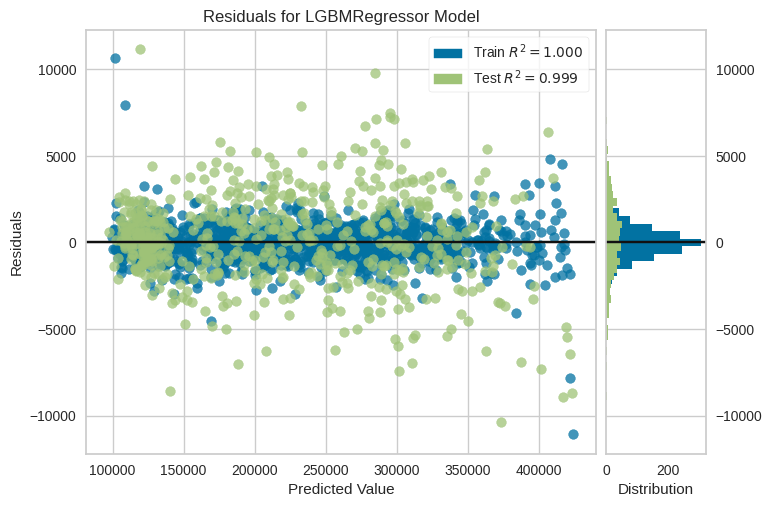

In [175]:
plot_model(best_model_ptvrv)

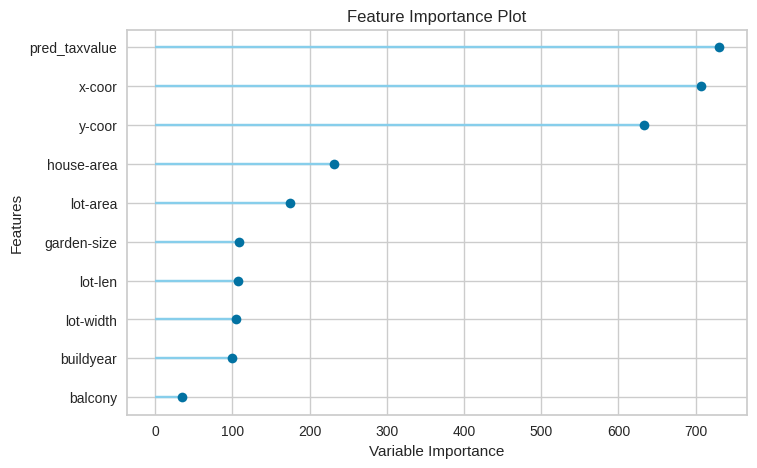

In [177]:
plot_model(best_model_ptvrv, plot="feature")

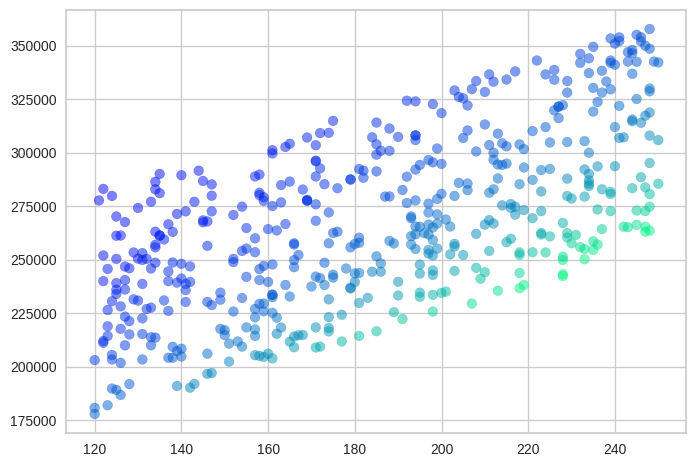

In [180]:
plt.scatter(
    data=train_df[train_df["zipcode"]=="3800"], x="house-area", y="taxvalue",
    c=train_df[train_df["zipcode"]=="3800"]["house-area"]/train_df[train_df["zipcode"]=="3800"]["lot-area"],
    cmap="winter",
    alpha=.5)

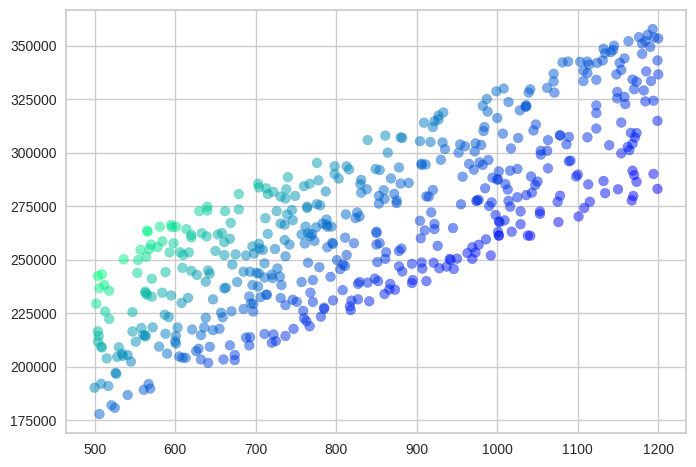

In [182]:
plt.scatter(
    data=train_df[train_df["zipcode"]=="3800"], x="lot-area", y="taxvalue",
    c=train_df[train_df["zipcode"]=="3800"]["house-area"]/train_df[train_df["zipcode"]=="3800"]["lot-area"],
    cmap="winter",
    alpha=.5)

In [186]:
z_3800 = train_df[train_df["zipcode"]=="3800"].copy()

In [199]:
z_3528 = train_df[train_df["zipcode"]=="3528"].copy()

In [204]:
z_3520 = train_df[train_df["zipcode"]=="3520"].copy()
z_3525 = train_df[train_df["zipcode"]=="3525"].copy()

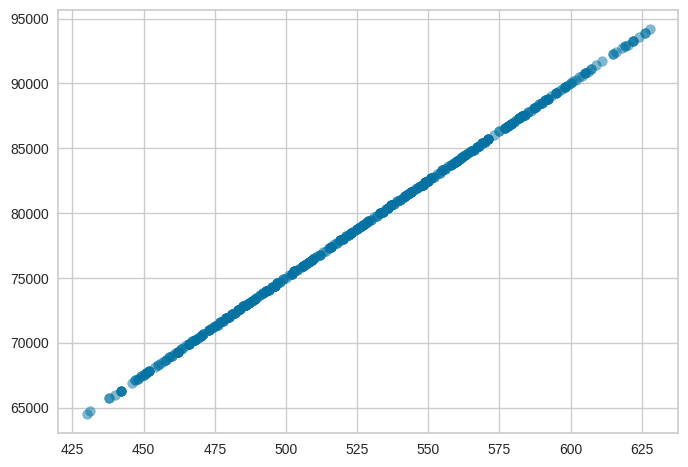

In [202]:
plt.scatter(x=z_3528["lot-area"] + (4*z_3528["house-area"]), y=z_3528["taxvalue"],
    #cmap="winter",
    alpha=.5)

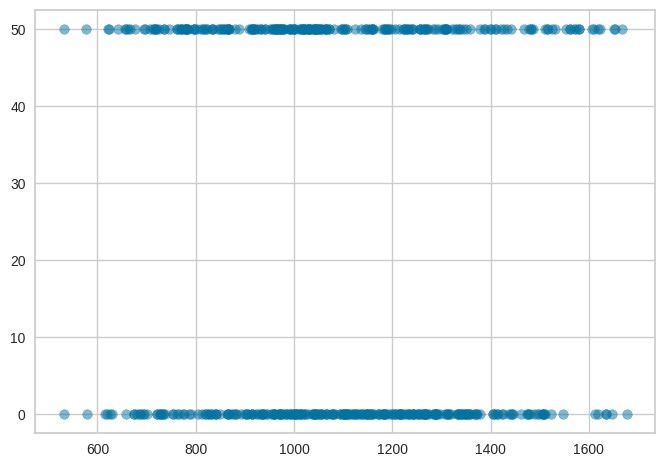

In [208]:
plt.scatter(x=(1*z_3525["lot-area"]) + (4*z_3525["house-area"]),
            y=z_3525["taxvalue"]-(5000 + (150*((1*z_3525["lot-area"]) + (4*z_3525["house-area"])))),
    #cmap="winter",
    alpha=.5)

In [210]:
(z_3520["taxvalue"]-(10000 + (150*((1*z_3520["lot-area"]) + (4*z_3520["house-area"]))))).mean()

24.07045009784736

In [209]:
(z_3525["taxvalue"]-(5000 + (150*((1*z_3525["lot-area"]) + (4*z_3525["house-area"]))))).mean()

23.34004024144869

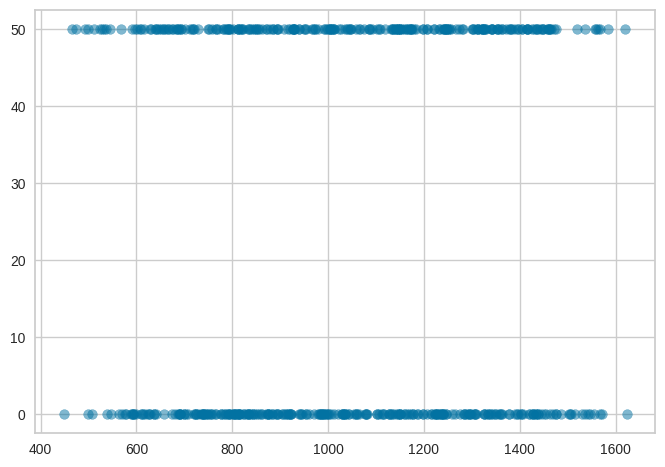

In [206]:
plt.scatter(x=(1*z_3520["lot-area"]) + (4*z_3520["house-area"]),
            y=z_3520["taxvalue"]-(10000 + (150*((1*z_3520["lot-area"]) + (4*z_3520["house-area"])))),
    #cmap="winter",
    alpha=.5)

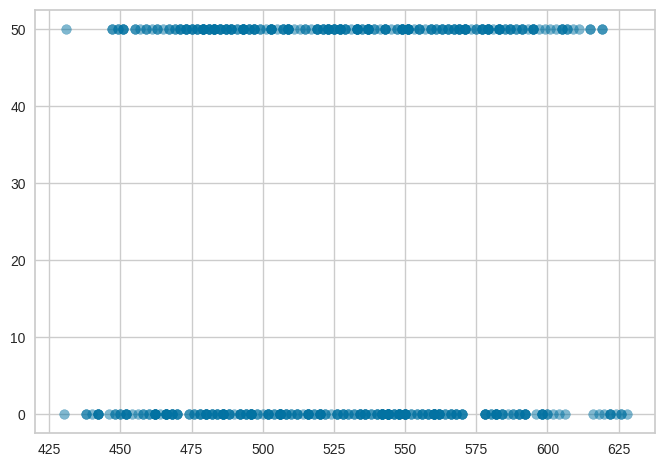

In [203]:
plt.scatter(x=(1*z_3528["lot-area"]) + (4*z_3528["house-area"]),
            y=z_3528["taxvalue"]-((150*((1*z_3528["lot-area"]) + (4*z_3528["house-area"])))),
    #cmap="winter",
    alpha=.5)

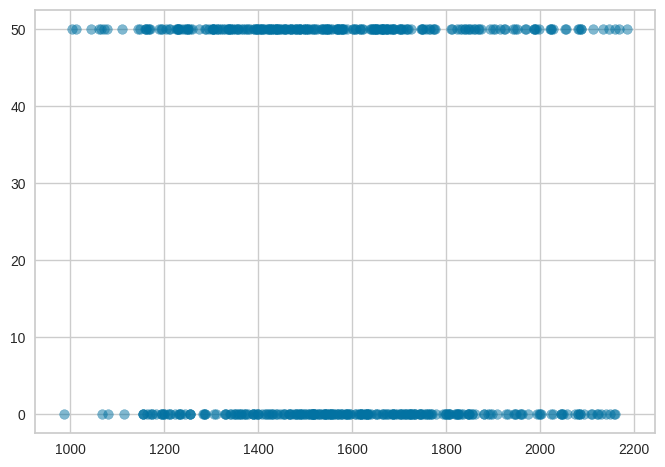

In [198]:
plt.scatter(x=(1*z_3800["lot-area"]) + (4*z_3800["house-area"]),
            y=z_3800["taxvalue"]-((150*((1*z_3800["lot-area"]) + (4*z_3800["house-area"]))) + 30000),
    #cmap="winter",
    alpha=.5)

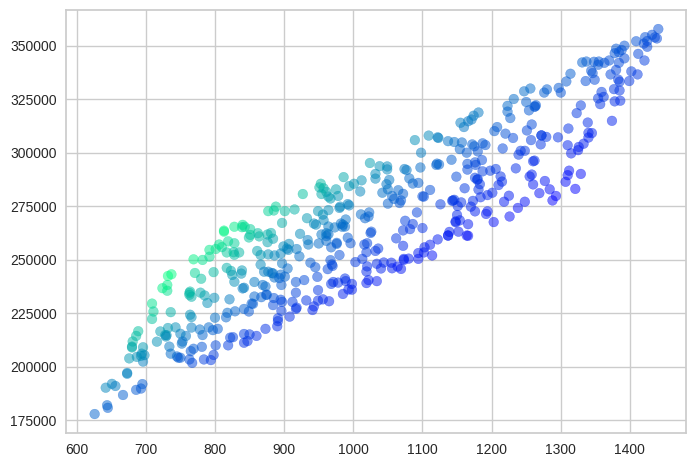

In [183]:
plt.scatter(
    data=train_df[train_df["zipcode"]=="3800"], x=train_df[train_df["zipcode"]=="3800"][["lot-area", "house-area"]].sum(axis=1), y="taxvalue",
    c=train_df[train_df["zipcode"]=="3800"]["house-area"]/train_df[train_df["zipcode"]=="3800"]["lot-area"],
    cmap="winter",
    alpha=.5)

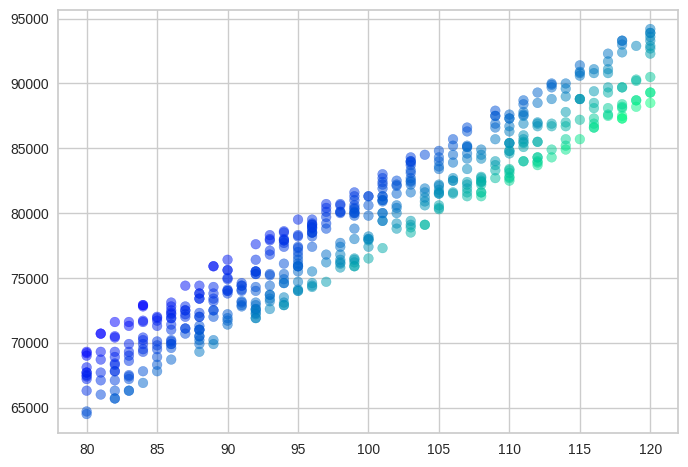

In [181]:
plt.scatter(
    data=train_df[train_df["zipcode"]=="3528"], x="house-area", y="taxvalue",
    c=train_df[train_df["zipcode"]=="3528"]["house-area"]/train_df[train_df["zipcode"]=="3528"]["lot-area"],
    cmap="winter",
    alpha=.5)

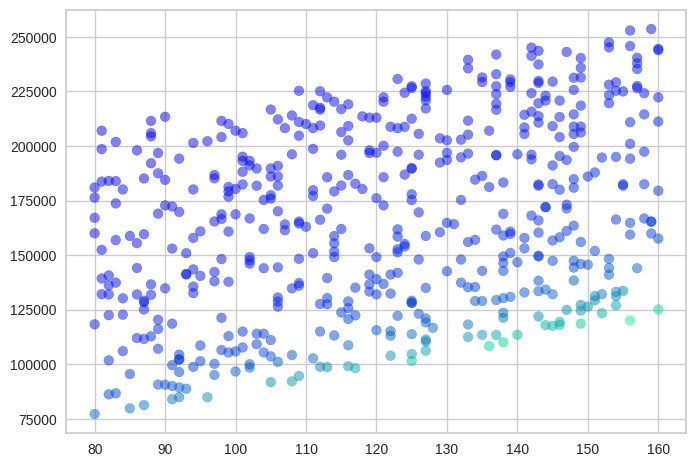

In [184]:
plt.scatter(
    data=train_df[train_df["zipcode"]=="3520"], x="house-area", y="taxvalue",
    c=train_df[train_df["zipcode"]=="3520"]["house-area"]/train_df[train_df["zipcode"]=="3520"]["lot-area"],
    cmap="winter",
    alpha=.5)

In [178]:
train_df["zipcode"].unique()

array(['3800', '3528', '3520', '3525'], dtype=object)